In [1]:
import sys
sys.path.insert(1, '../')

# get parameters.
from dev_modules.vcs_params import params_dataset

In [2]:
# visualize results.
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import from OS.
import copy
from natsort import natsorted
import os

# Import params

In [3]:
FILES_TO_SHOW = 8

In [4]:
DATASET_PATH = os.path.join("..",
                            params_dataset.DATASET_ROOT_DIR,
                            params_dataset.DATASET_TYPE)
print(DATASET_PATH)

../dataset/resize_128


In [5]:
CLASSES_LIST = [params_dataset.USABLE_DIR,
                params_dataset.DEFECTIVE_DIR]

print("classes list =", CLASSES_LIST)

classes list = ['0_utilizavel', '1_defeituoso']


# Files for each class

In [6]:
def files_inside(path:str) -> list:
    """
    Return a list of files inside 'path'.
    """
    files_list = list()
    for root, subdir, files in os.walk(path):
        for file in files:
            files_list.append(os.path.join(root, file))
    
    return natsorted(files_list)

In [7]:
def get_classes_files(base_dataset_path:str,
                      classes_names:list,
                      complete:bool = False) -> list:
    """
    Return a list with files for each class.
    """
    files_set = list()
    
    for class_name in classes_names:
        # loop inside all dirs.
        if complete:
            same_class_files = list()
            for root, dir, files in os.walk(base_dataset_path):
                if root.endswith(class_name):
                    same_class_files.extend(files_inside(root))
            
            same_class_files = natsorted(same_class_files)
            files_set.append(same_class_files)
        
        # if already divided: look to specific folder.
        else:    
            class_path = os.path.join(base_dataset_path, class_name)
            files_set.append(files_inside(class_path))
    
    return files_set

# COMPLETE dataset

In [8]:
print("complete_path =", DATASET_PATH)

complete_path = ../dataset/resize_128


In [9]:
complete_files = get_classes_files(DATASET_PATH, CLASSES_LIST,
                                   complete=True)
print("Number of categories =", len(complete_files))

complete_dict = dict()
for id, files in enumerate(complete_files):
    complete_dict[CLASSES_LIST[id]] = [len(files)]
    
complete_df = pd.DataFrame(complete_dict)
print(complete_df)

Number of categories = 2
   0_utilizavel  1_defeituoso
0           517           780


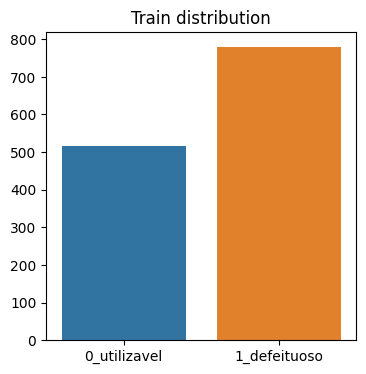

total = 1297
usable/total = 0.39861218195836545
defective/total = 0.6013878180416345


In [10]:
plt.figure(figsize=(4,4))
sns.barplot(complete_df)
plt.title("Train distribution")
plt.show()

total_train = complete_df.T.sum()[0]
print("total =", total_train)
print("usable/total =", len(complete_files[0]) / total_train)
print("defective/total =", len(complete_files[1]) / total_train)

# Train dataset

In [11]:
TRAIN_PATH = os.path.join(DATASET_PATH,
                          params_dataset.TRAIN_DIR)
print("train_path =", TRAIN_PATH)

train_path = ../dataset/resize_128/train


In [12]:
train_files = get_classes_files(TRAIN_PATH, CLASSES_LIST)
print("Number of categories =", len(train_files))

train_dict = dict()
for id, files_set in enumerate(train_files):
    train_dict[CLASSES_LIST[id]] = [len(files_set)]
    
train_df = pd.DataFrame(train_dict)
print(train_df)

Number of categories = 2
   0_utilizavel  1_defeituoso
0           444           670


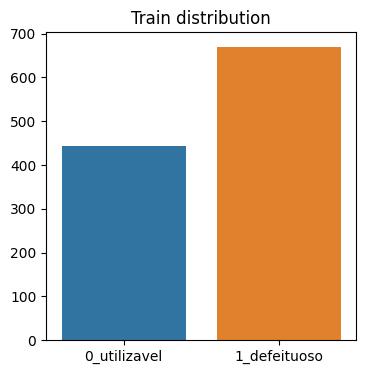

total = 1114
usable/total = 0.3985637342908438
defective/total = 0.6014362657091562


In [13]:
plt.figure(figsize=(4,4))
sns.barplot(train_df)
plt.title("Train distribution")
plt.show()

total_train = train_df.T.sum()[0]
print("total =", total_train)
print("usable/total =", len(train_files[0]) / total_train)
print("defective/total =", len(train_files[1]) / total_train)

## Show

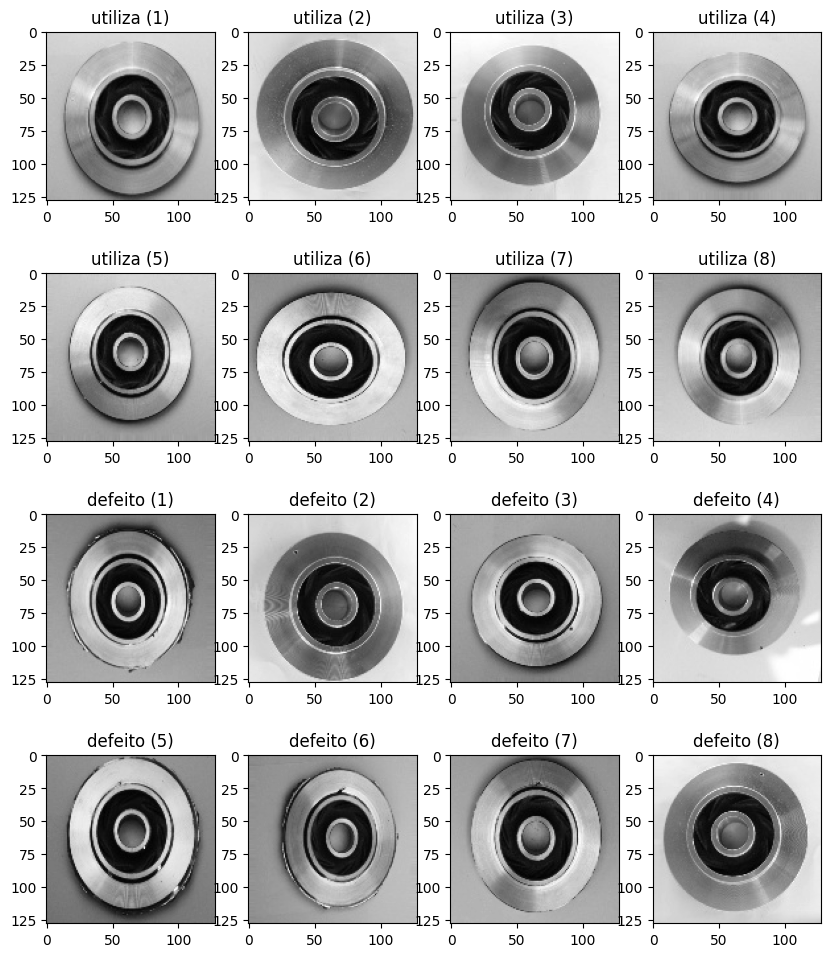

In [14]:
plt.figure(figsize=(10, 12))

counter = 0
for categorie_id, categorie_files in enumerate(train_files):
    for file in range(FILES_TO_SHOW):
        counter += 1
        plt.subplot(4, 4, counter)
        img = cv2.imread(categorie_files[file], cv2.IMREAD_GRAYSCALE)
        plt.imshow(img, cmap="gray")
        plt.title(categorie_files[file].split("/")[-1].split('.')[0])
        
plt.show()

# Test

In [15]:
TEST_PATH = os.path.join(DATASET_PATH,
                         params_dataset.TEST_DIR)
print("test_path =", TEST_PATH)

test_path = ../dataset/resize_128/test


In [16]:
test_files = get_classes_files(TEST_PATH, CLASSES_LIST)
print("Number of categories =", len(test_files))

test_dict = dict()
for id, files_set in enumerate(test_files):
    test_dict[CLASSES_LIST[id]] = [len(files_set)]
    
test_df = pd.DataFrame(test_dict)
print(test_df)

Number of categories = 2
   0_utilizavel  1_defeituoso
0            73           110


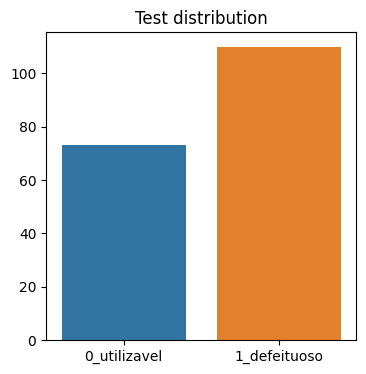

total = 183
usable/total = 0.3989071038251366
defective/total = 0.6010928961748634


In [17]:
plt.figure(figsize=(4,4))
sns.barplot(test_df)
plt.title("Test distribution")
plt.show()

total_test = test_df.T.sum()[0]
print("total =", total_test)
print("usable/total =", len(test_files[0]) / total_test)
print("defective/total =", len(test_files[1]) / total_test)

## Show

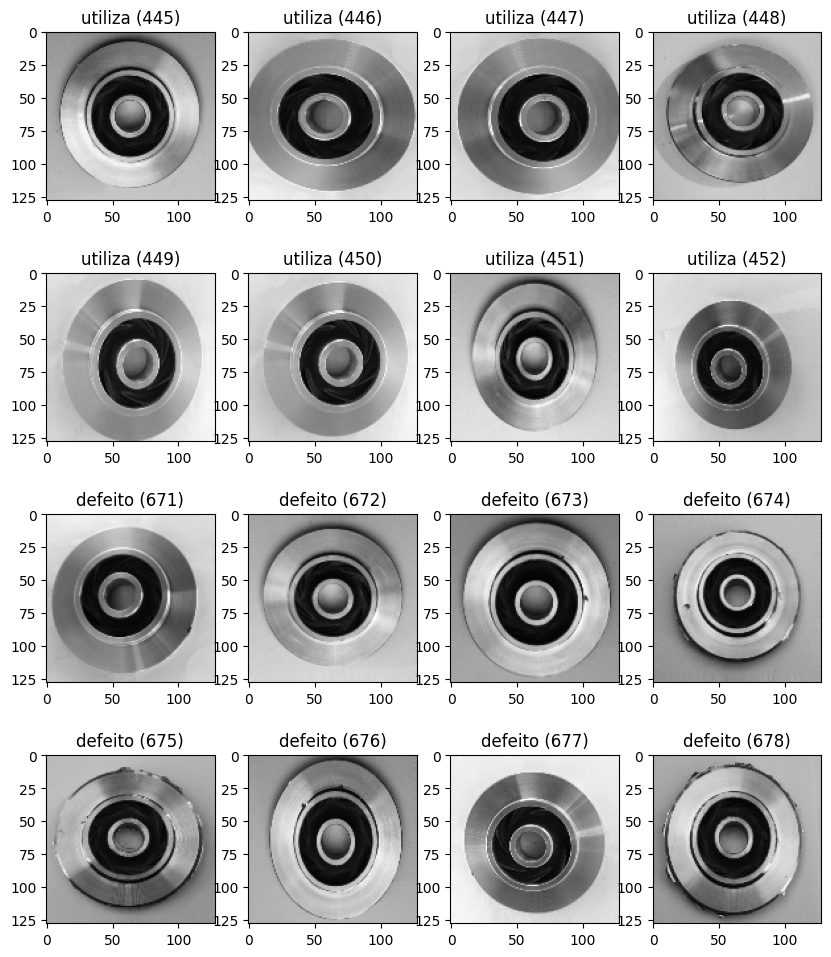

In [18]:
plt.figure(figsize=(10, 12))

counter = 0
for categorie_id, categorie_files in enumerate(test_files):
    for file in range(FILES_TO_SHOW):
        counter += 1
        plt.subplot(4, 4, counter)
        img = cv2.imread(categorie_files[file], cv2.IMREAD_GRAYSCALE)
        plt.imshow(img, cmap="gray")
        plt.title(categorie_files[file].split("/")[-1].split('.')[0])
        
plt.show()